# 서울시 IoT EDA

## Basic setting

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumSquare' # plt 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨지는 문제 해결

# base path
base_path = '/content/drive/MyDrive/Albatross/seoul/'
eda_path = base_path + 'EDA/eda_data/'

## Figs

#### Fig 1_1. 서울시 공영주차장 안내 정보

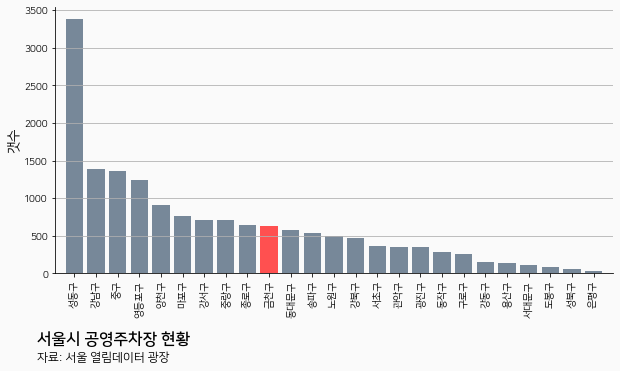

In [2]:
datum1 = pd.read_csv(eda_path + '서울시 공영주차장 안내 정보.csv', encoding='cp949')
datum1['구']=datum1['주소'].str.extract(r'([가-힣]+구)')
num = datum1['구'].value_counts() # sort

fig, ax = plt.subplots(nrows=2, figsize=(10,6), gridspec_kw={'height_ratios':[9,1]})
color_map = ['#778899' for _ in range(25)]
color_map[9] = '#FF5050'
ax[0].bar(num.index, num.values, color=color_map)
ax[0].grid(axis='y')
fig.set_facecolor('#fafafa')
ax[0].set_facecolor('#fafafa')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].margins(x=0.02)

ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylabel('갯수', fontdict={'fontsize':14})

fig.text(0.1, 0.10, '서울시 공영주차장 현황', fontdict={'fontsize':16, 'fontweight':'bold'})
fig.text(0.1, 0.06, '자료: 서울 열림데이터 광장', fontdict={'fontsize':12})
ax[1].axis('off')
plt.show()

#### Fig 1_2. 서울시 공영주차장 안내 정보 (총주차면수)

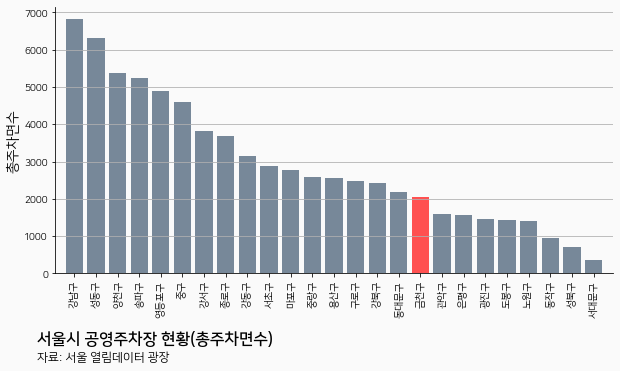

In [3]:
datum1 = pd.read_csv(eda_path + '서울시 공영주차장 안내 정보.csv', encoding='cp949')
datum1['구']=datum1['주소'].str.extract(r'([가-힣]+구)')
num2 = datum1.groupby('구').sum()['총주차면'].sort_values(ascending=False)

fig, ax = plt.subplots(nrows=2, figsize=(10,6), gridspec_kw={'height_ratios':[9,1]})
color_map = ['#778899' for _ in range(25)]
color_map[16] = '#FF5050'
ax[0].bar(num2.index, num2.values, color=color_map)
ax[0].grid(axis='y')
fig.set_facecolor('#fafafa')
ax[0].set_facecolor('#fafafa')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].margins(x=0.02)

ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylabel('총주차면수', fontdict={'fontsize':14})

fig.text(0.1, 0.10, '서울시 공영주차장 현황(총주차면수)', fontdict={'fontsize':16, 'fontweight':'bold'})
fig.text(0.1, 0.06, '자료: 서울 열림데이터 광장', fontdict={'fontsize':12})
ax[1].axis('off')
plt.show()

#### Fig 2. 서울시 주차장 주차면수 현황

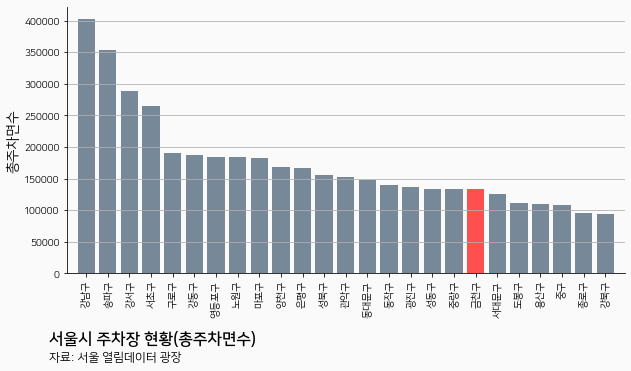

In [4]:
datum2 = pd.read_csv(eda_path + '서울시주차장확보율(2021년).csv')
datum2.set_index('자치구별(2)', inplace=True)
num3 = datum2['주차면수 (면)'].sort_values(ascending=False)

fig, ax = plt.subplots(nrows=2, figsize=(10,6), gridspec_kw={'height_ratios':[9,1]})
color_map = ['#778899' for _ in range(25)]
color_map[18] = '#FF5050'
ax[0].bar(num3.index, num3.values, color=color_map)
ax[0].grid(axis='y')
fig.set_facecolor('#fafafa')
ax[0].set_facecolor('#fafafa')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].margins(x=0.02)

ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylabel('총주차면수', fontdict={'fontsize':14})

fig.text(0.1, 0.10, '서울시 주차장 현황(총주차면수)', fontdict={'fontsize':16, 'fontweight':'bold'})
fig.text(0.1, 0.06, '자료: 서울 열림데이터 광장', fontdict={'fontsize':12})
ax[1].axis('off')
plt.show()

#### Fig 3. 서울시 주택가 주차장 확보율

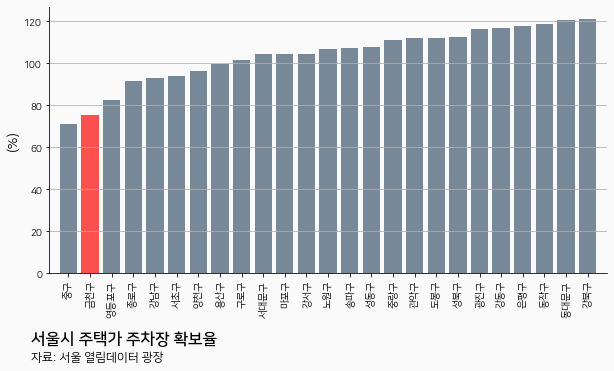

In [5]:
datum3 = pd.read_csv(eda_path + '서울시주택가주차장.csv')

seoul_dict=dict()
for region in num.index:
  seoul_dict[region] = float(datum3.loc[(datum3['자치구별(2)']==region) & (datum3['구분별(1)']=='주택가주차장확보율 (%)') & (datum3['구분별(2)']=='소계'), '2021'].values)
sorted_seoul = dict(sorted(seoul_dict.items(), key=lambda x: x[1]))

fig, ax = plt.subplots(nrows=2, figsize=(10,6), gridspec_kw={'height_ratios':[9,1]})
color_map = ['#778899' for _ in range(25)]
color_map[1] = '#FF5050'
ax[0].bar(sorted_seoul.keys(), sorted_seoul.values(), color=color_map)
ax[0].grid(axis='y')
fig.set_facecolor('#fafafa')
ax[0].set_facecolor('#fafafa')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].margins(x=0.02)

ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylabel('(%)', fontdict={'fontsize':14})

fig.text(0.1, 0.10, '서울시 주택가 주차장 확보율', fontdict={'fontsize':16, 'fontweight':'bold'})
fig.text(0.1, 0.06, '자료: 서울 열림데이터 광장', fontdict={'fontsize':12})
ax[1].axis('off')
plt.show()